<a href="https://colab.research.google.com/github/redcican/TensorFlow-Specialization/blob/master/24_Course3_NLP_Week4_Exercise_Shakespeare_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
# Figure out how to import regularizers
from tensorflow.keras import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2019-10-05 13:13:41--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2019-10-05 13:13:46 (101 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [5]:
model = Sequential()
model.add(Embedding(total_words, 128, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
# Pick an optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10, 128)           411008    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 10, 300)           334800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 300)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               219648    
_________________________________________________________________
dense_1 (Dense)              (None, 1605)              207045    
_________________________________________________________________
dense_2 (Dense)              (None, 3211)              5156866   
Total params: 6,329,367
Trainable params: 6,329,367
Non-trainable params: 0
____________________________________________

In [6]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
15462/15462 [==============================] - 41s 3ms/sample - loss: 6.9194 - acc: 0.0195
Epoch 2/100
15462/15462 [==============================] - 39s 3ms/sample - loss: 6.4978 - acc: 0.0214
Epoch 3/100
15462/15462 [==============================] - 39s 3ms/sample - loss: 6.3863 - acc: 0.0270
Epoch 4/100
15462/15462 [==============================] - 39s 3ms/sample - loss: 6.2561 - acc: 0.0308
Epoch 5/100
15462/15462 [==============================] - 39s 3ms/sample - loss: 6.1565 - acc: 0.0371
Epoch 6/100
15462/15462 [==============================] - 39s 3ms/sample - loss: 6.0748 - acc: 0.0389
Epoch 7/100
15462/15462 [==============================] - 38s 2ms/sample - loss: 5.9804 - acc: 0.0395
Epoch 8/100
15462/15462 [==============================] - 39s 2ms/sample - loss: 5.8830 - acc: 0.0469
Epoch 9/100
15462/15462 [==============================] - 38s 2ms/sample - loss: 

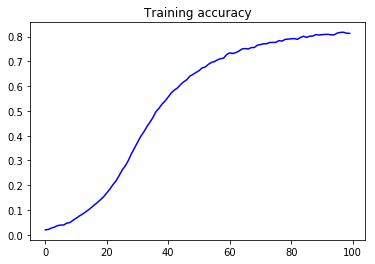

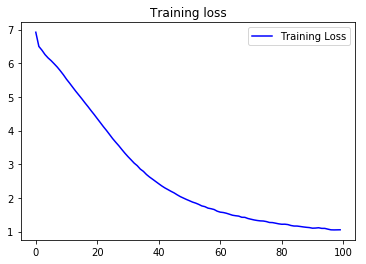

In [7]:
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [8]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope should bear their way staineth place ' back something good fall from thee so most deeds of dwell of pride all ' belongs to me worth back clears with good hour hate cold aside ye quite abuse me back knowing thee sinful hate clears quite abuse me now these head die live to so old spent still new smells write of my heart to thee still show those place ' brought to thee they live remains old loss in thee make now say others others stand mother dead prove to none none afford afford ye back back back pass back


In [9]:
token_list

array([[   3,  189,  189, 2311, 2311, 1121,  259,  259,  259,  783]],
      dtype=int32)

In [10]:
token_list[0]

array([   3,  189,  189, 2311, 2311, 1121,  259,  259,  259,  783],
      dtype=int32)